In [44]:
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
df1 = pd.read_csv('/Users/rumethsandinu/Study/Assessments/Year 2/DSGP/Datasets/annex/item.csv')
df1.head()

,Item Code,Item Name,Category Code,Category Name
0,102900005115168,Niushou Shengcai,1011010101,Flower/Leaf Vegetables
1,102900005115199,Sichuan Red Cedar,1011010101,Flower/Leaf Vegetables
2,102900005115625,Local Xiaomao Cabbage,1011010101,Flower/Leaf Vegetables
3,102900005115748,White Caitai,1011010101,Flower/Leaf Vegetables
4,102900005115762,Amaranth,1011010101,Flower/Leaf Vegetables


In [46]:
df1.shape

(251, 4)

In [47]:
df1.isnull().sum()

Item Code        0
Item Name        0
Category Code    0
Category Name    0
dtype: int64

In [48]:
df1['Category Name'].value_counts()

Category Name
Flower/Leaf Vegetables         100
Edible Mushroom                 72
Capsicum                        45
Aquatic Tuberous Vegetables     19
Solanum                         10
Cabbage                          5
Name: count, dtype: int64

In [49]:
def rename_category(data):
    if data == 'Flower/Leaf Vegetables':
        return 'Flower'
    return data

df1['Category Name'] = df1['Category Name'].apply(rename_category)
df1['Category Name'].value_counts()

Category Name
Flower                         100
Edible Mushroom                 72
Capsicum                        45
Aquatic Tuberous Vegetables     19
Solanum                         10
Cabbage                          5
Name: count, dtype: int64

In [50]:
# not needed

df2 = pd.read_csv('/Users/rumethsandinu/Study/Assessments/Year 2/DSGP/Datasets/annex/loss rate.csv')
df2.head()

,Item Code,Item Name,Loss Rate (%)
0,102900005115168,Niushou Shengcai,4.39
1,102900005115199,Sichuan Red Cedar,10.46
2,102900005115250,Xixia Black Mushroom (1),10.80
3,102900005115625,Local Xiaomao Cabbage,0.18
4,102900005115748,White Caitai,8.78


In [51]:
df3 = pd.read_csv('/Users/rumethsandinu/Study/Assessments/Year 2/DSGP/Datasets/annex/sale.csv')
df3.head()

,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No)
0,2020-07-01,09:15:07.924,102900005117056,0.396,7.6,sale,No
1,2020-07-01,09:17:27.295,102900005115960,0.849,3.2,sale,No
2,2020-07-01,09:17:33.905,102900005117056,0.409,7.6,sale,No
3,2020-07-01,09:19:45.450,102900005115823,0.421,10.0,sale,No
4,2020-07-01,09:20:23.686,102900005115908,0.539,8.0,sale,No


In [52]:
df3.shape

(878503, 7)

In [53]:
df3 = df3.drop(['Date', 'Time'], axis=1)
df3.isnull().sum()

Item Code                      0
Quantity Sold (kilo)           0
Unit Selling Price (RMB/kg)    0
Sale or Return                 0
Discount (Yes/No)              0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x141f32ac0>,
 'caps': [<matplotlib.lines.Line2D at 0x145b27e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x141f324f0>],
 'medians': [<matplotlib.lines.Line2D at 0x141f4ddf0>],
 'fliers': [<matplotlib.lines.Line2D at 0x141f4db80>],
 'means': []}

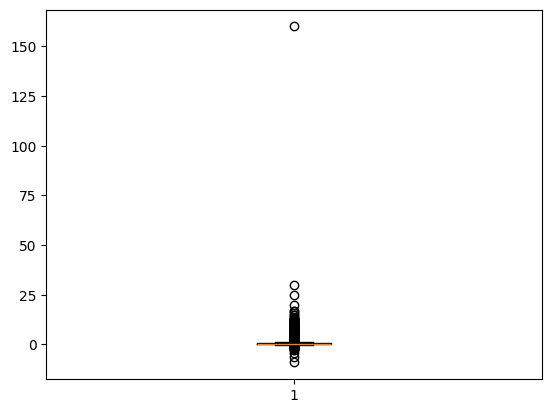

In [54]:
plt.boxplot(df3['Quantity Sold (kilo)'])

In [55]:
(df3['Quantity Sold (kilo)'] > 75).sum()

1

In [56]:
df3 = df3[~(df3['Quantity Sold (kilo)'] > 75)]

In [57]:
((df3['Quantity Sold (kilo)'] < 0).sum()) == ((df3['Sale or Return'] == 'return').sum())

True

{'whiskers': [<matplotlib.lines.Line2D at 0x151f57550>,
 'caps': [<matplotlib.lines.Line2D at 0x151f57a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x151f572b0>],
 'medians': [<matplotlib.lines.Line2D at 0x151f57fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x151f5f2b0>],
 'means': []}

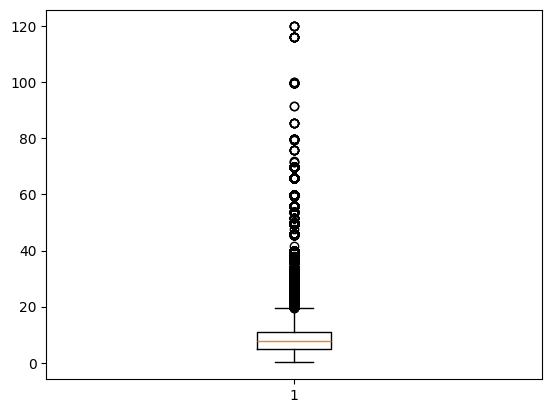

In [58]:
plt.boxplot(df3['Unit Selling Price (RMB/kg)'])

In [59]:
df4 = pd.read_csv('/Users/rumethsandinu/Study/Assessments/Year 2/DSGP/Datasets/annex/wholesale price.csv')
df4.head()

,Date,Item Code,Wholesale Price (RMB/kg)
0,2020-07-01,102900005115762,3.88
1,2020-07-01,102900005115779,6.72
2,2020-07-01,102900005115786,3.19
3,2020-07-01,102900005115793,9.24
4,2020-07-01,102900005115823,7.03


In [60]:
df4.shape

(55982, 3)